In [1]:
#交差検証
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import codecs
import seaborn as sns

In [2]:
video_tsv_merge_data = pd.read_table('./Output/video_tsv_merge_data.tsv',sep="\t", index_col=None)

In [3]:
# UNIX時間を変換
video_tsv_merge_data['upload_time'] =  pd.to_datetime(video_tsv_merge_data['upload_time'], unit='s')
video_tsv_merge_data['year'] = video_tsv_merge_data['upload_time'].dt.year
video_tsv_merge_data['month'] = video_tsv_merge_data['upload_time'].dt.month
video_tsv_merge_data['day'] = video_tsv_merge_data['upload_time'].dt.day
video_tsv_merge_data['hour'] = video_tsv_merge_data['upload_time'].dt.hour
video_tsv_merge_data['weekday_name'] = video_tsv_merge_data['upload_time'].dt.weekday_name

In [4]:
video_tsv_merge_data = video_tsv_merge_data.fillna({'category':'category_NaN'})
#video_tsv_merge_data

In [5]:
#watch_num(合計)
video_tsv_merge_pivot = pd.pivot_table(video_tsv_merge_data, index=['month'],columns=['year'], values=['watch_num'],aggfunc=np.sum, dropna=True, margins=True, margins_name='Total')
video_tsv_merge_pivot = video_tsv_merge_pivot.fillna(0)
video_tsv_merge_pivot.to_csv('./OutPut/pivot_count/year/video_pivot_month_watch_num.tsv', sep='\t')
video_tsv_merge_pivot_read = pd.read_table('./OutPut/pivot_count/year/video_pivot_month_watch_num.tsv',sep="\t", index_col=0,header=1)
#論文集計用
flights = video_tsv_merge_pivot_read.iloc[13:14,1:13]
year_watch_num_pivot = flights.T
year_watch_num_pivot.columns = ["watch_num"]

In [6]:
#comment_num(合計)
video_tsv_merge_pivot = pd.pivot_table(video_tsv_merge_data, index=['month'],columns=['year'], values=['comment_num'],aggfunc=np.sum, dropna=True, margins=True, margins_name='Total')
video_tsv_merge_pivot = video_tsv_merge_pivot.fillna(0)
video_tsv_merge_pivot.to_csv('./OutPut/pivot_count/year/video_pivot_month_comment_num.tsv', sep='\t')
video_tsv_merge_pivot_read = pd.read_table('./OutPut/pivot_count/year/video_pivot_month_comment_num.tsv',sep="\t", index_col=0,header=1)
#論文集計用
flights = video_tsv_merge_pivot_read.iloc[13:14,1:13]
year_comment_num_pivot = flights.T
year_comment_num_pivot.columns = ["comment_num"]

In [7]:
#mylist_num(合計)
video_tsv_merge_pivot = pd.pivot_table(video_tsv_merge_data, index=['month'],columns=['year'], values=['mylist_num'],aggfunc=np.sum, dropna=True, margins=True, margins_name='Total')
video_tsv_merge_pivot = video_tsv_merge_pivot.fillna(0)
video_tsv_merge_pivot.to_csv('./OutPut/pivot_count/year/video_pivot_month_mylist_num.tsv', sep='\t')
video_tsv_merge_pivot_read = pd.read_table('./OutPut/pivot_count/year/video_pivot_month_mylist_num.tsv',sep="\t", index_col=0,header=1)
#論文集計用
flights = video_tsv_merge_pivot_read.iloc[13:14,1:13]
year_mylist_num_pivot = flights.T
year_mylist_num_pivot.columns = ["mylist_num"]

In [8]:
#count(合計)
video_tsv_merge_pivot = pd.pivot_table(video_tsv_merge_data, index=['month'],columns=['year'], values=['video_id'],aggfunc='count', dropna=True, margins=True, margins_name='Total')
video_tsv_merge_pivot = video_tsv_merge_pivot.fillna(0)
video_tsv_merge_pivot.to_csv('./OutPut/pivot_count/year/video_pivot_month_video_id_count.tsv', sep='\t')
video_tsv_merge_pivot_read = pd.read_table('./OutPut/pivot_count/year/video_pivot_month_video_id_count.tsv',sep="\t", index_col=0,header=1)
video_tsv_merge_pivot_read
#論文集計用
flights = video_tsv_merge_pivot_read.iloc[13:14,1:13]
year_count_pivot = flights.T
year_count_pivot.columns = ["count"]

In [9]:
#length(平均)
video_tsv_merge_pivot = pd.pivot_table(video_tsv_merge_data, index=['month'],columns=['year'], values=['length'],aggfunc=np.mean, dropna=True, margins=True, margins_name='Total')
video_tsv_merge_pivot = video_tsv_merge_pivot.fillna(0)
video_tsv_merge_pivot.to_csv('./OutPut/pivot_count/year/video_pivot_length.tsv', sep='\t')
video_tsv_merge_pivot_read = pd.read_table('./OutPut/pivot_count/year/video_pivot_length.tsv',sep="\t", index_col=0,header=1)
#論文集計用
flights = video_tsv_merge_pivot_read.iloc[13:14,1:13]
year_length_pivot = flights.T
year_length_pivot.columns = ["length"]

In [10]:
#size_high(合計)
video_tsv_merge_pivot = pd.pivot_table(video_tsv_merge_data, index=['month'],columns=['year'], values=['size_high'],aggfunc=np.sum, dropna=True, margins=True, margins_name='Total')
video_tsv_merge_pivot = video_tsv_merge_pivot.fillna(0)
video_tsv_merge_pivot.to_csv('./OutPut/pivot_count/year/video_pivot_month_size_high.tsv', sep='\t')
video_tsv_merge_pivot_read = pd.read_table('./OutPut/pivot_count/year/video_pivot_month_size_high.tsv',sep="\t", index_col=0,header=1)
#論文集計用
flights = video_tsv_merge_pivot_read.iloc[13:14,1:13]
year_size_high_pivot = flights.T
year_size_high_pivot.columns = ["size_high"]

In [11]:
#論文用の表を出力
year_concat = pd.concat([year_watch_num_pivot,year_comment_num_pivot,year_mylist_num_pivot,year_count_pivot,year_length_pivot,year_size_high_pivot],axis=1)
year_concat.to_csv('./OutPut/pivot_count/year/year_concat.tsv', sep='\t')
year_concat = pd.read_table('./OutPut/pivot_count/year/year_concat.tsv',sep="\t", index_col=0,header=0)
year_concat

,watch_num,comment_num,mylist_num,count,length,size_high
2007,5.814480e+09,567490939.0,60480895.0,341956.0,501.622147,6.291661e+12
2008,9.766948e+09,617547118.0,108275350.0,1019794.0,545.537625,2.066789e+13
2009,8.919755e+09,452899702.0,108303014.0,1244285.0,684.801943,3.994011e+13
2010,8.943290e+09,401419916.0,109874506.0,1567745.0,689.562156,6.021373e+13
2011,8.620262e+09,391913096.0,110378872.0,1710460.0,696.566673,7.787537e+13
2012,9.450352e+09,316731576.0,118878017.0,1717947.0,717.077111,8.973641e+13
2013,9.475435e+09,240207860.0,95628541.0,1610989.0,734.640256,9.328835e+13
2014,9.395801e+09,224096843.0,83777048.0,1558925.0,738.979148,9.730356e+13
2015,1.005514e+10,221052049.0,83378154.0,1658839.0,744.342906,1.104202e+14
2016,8.415210e+09,162981048.0,64295946.0,1606669.0,759.859425,1.111770e+14


In [12]:
video_tsv_merge_pivot = pd.pivot_table(video_tsv_merge_data, index=['year'],columns=['category'], values=['video_id'],aggfunc='count', dropna=True)
video_tsv_merge_pivot = video_tsv_merge_pivot.fillna(0)
video_tsv_merge_pivot.to_csv('./OutPut/pivot_count/year/video_category_count.tsv', sep='\t')
video_tsv_merge_pivot_read = pd.read_table('./OutPut/pivot_count/year/video_category_count.tsv',sep="\t", index_col=0,header=1)
#video_tsv_merge_pivot_read

In [13]:
result_video_tag_year = video_tsv_merge_pivot_read.iloc[2:14,0:39].T.sort_values("2018",ascending=False)
result_video_tag_year = result_video_tag_year.astype(int)
result_video_tag_year.to_csv('./OutPut/pivot_count/result/result_video_tag_yeart.tsv', sep='\t')
result_video_tag_year.iloc[2:14,0:39]

category,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
category_NaN,122029,262188,364137,297603,181249,176479,168967,175886,176059,210156,180891,137233
エンターテイメント,8115,34174,36689,54908,77823,77303,72949,69434,75287,72447,70780,67689
音楽,30317,111844,109878,143113,154328,125090,88816,74963,73770,62269,60373,50651
歌ッテミタ,9213,39114,47702,91362,111448,111196,92263,70833,61779,55542,51741,46867
ソノ他,3803,10586,10143,22442,38611,35063,35043,37713,48521,42412,40770,36662
アニメ,20578,45193,35867,44807,58771,61296,54012,51634,56600,48700,46786,34706
例ノアレ,28,346,670,7885,12221,12947,14625,17302,24763,36355,42621,33576
VOCALOID,865,7427,12989,35283,44916,54268,53062,46483,42066,36994,34814,31312
アイドルマスター,6218,18897,23935,33117,35519,35106,28190,26681,25889,31283,31723,27884
ラジオ,5310,12695,15234,17442,20749,22368,21728,20463,20994,21003,22302,18900


In [18]:
result_video_tag_year.sum(axis=1).sort_values(ascending=[False]).to_csv('./OutPut/pivot_count/result/result_video_tag_year_sum.tsv', sep='\t')
result_video_tag_year.sum(axis=1).sort_values(ascending=[False])

ゲーム                             6872919
category_NaN                    2452877
音楽                              1085412
歌ッテミタ                            789060
エンターテイメント                        717598
実況プレイ動画                          599379
アニメ                              558950
VOCALOID                         400479
ソノ他                              361769
アイドルマスター                         324442
東方                               259521
スポーツ                             223261
ラジオ                              219188
演奏シテミタ                           218665
政治                               203711
例ノアレ                             203339
R-18                             167605
動物                               167308
踊ッテミタ                            154514
日記                               124538
車載動画                              91179
描イテミタ                             69924
料理                                68615
旅行                                56837
科学                                52615


C:\Users\AdminUser\Anaconda2\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  if __name__ == '__main__':


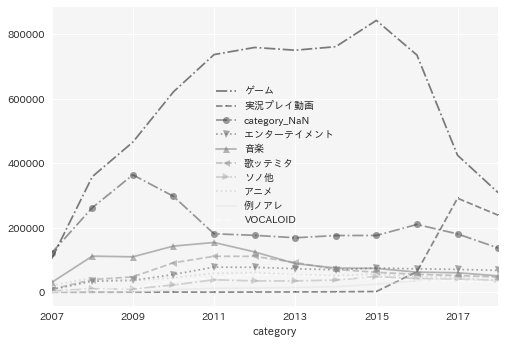

In [22]:
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
from matplotlib.font_manager import FontProperties
import matplotlib

fig = plt.figure()
font = {'family' : 'IPAexGothic'}
matplotlib.rc('font', **font)
styles = ['-.', '--,', '-.o', ':v','-^', '--<', '-.>', ':1','-2', '--3']
result_video_tag_year.iloc[0:10,0:39].T.plot(cmap='gray', alpha=0.5,style=styles,grid=True).set_axis_bgcolor('whitesmoke') 